In [1]:
import pandas as pd
import numpy as np

# Load the Excel file
xls = pd.read_excel(r'D:\MSAIM\trimister-2 msaiml\Adv-Machine_learning\DATASETS\Investment_dataset\IMFInvestmentandCapitalStockDataset2021 (2).xlsx', sheet_name=['Definitions', 'Dataset'])

# Extract the 'Dataset' sheet
df = xls['Dataset']

# Convert the 'income' column to dummy variables
df = pd.concat([df, pd.get_dummies(df['income'], prefix='income')], axis=1)
df.drop('income', axis=1, inplace=True)


In [2]:
df_india = df[df['country']=='India']
df_india.groupby('country').apply(lambda x: x.sort_values('year')).head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_26540\729605786.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_india.groupby('country').apply(lambda x: x.sort_values('year')).head()


isocode  ifscode country  year  igov_rppp   kgov_rppp  \
country                                                              
India   4560     IND      534   India  1960  21.343164  469.095490   
        4561     IND      534   India  1961  22.196890  478.444489   
        4562     IND      534   India  1962  23.084764  488.313263   
        4563     IND      534   India  1963  24.008156  498.718750   
        4564     IND      534   India  1964  24.968483  509.678558   

              ipriv_rppp  kpriv_rppp  ippp_rppp  kppp_rppp    GDP_rppp  \
country                                                                  
India   4560   44.512562  414.289185        NaN        NaN  447.601074   
        4561   46.293060  440.248566        NaN        NaN  463.651825   
        4562   48.144779  466.752167        NaN        NaN  479.111816   
        4563   50.070572  493.835327        NaN        NaN  510.586517   
        4564   52.073395  521.534241        NaN        NaN  548.536560   

              igov_n  kgov_n  ipriv_n  kpriv_n  kppp_n       GDP_n  \
country                                                              
India   4560     NaN     NaN      NaN      NaN     NaN  175.371170   
        4561     NaN     NaN      NaN      NaN     NaN  185.017517   
        4562     NaN     NaN      NaN      NaN     NaN  198.925888   
        4563     NaN     NaN      NaN      NaN     NaN  228.274063   
        4564     NaN     NaN      NaN      NaN     NaN  266.142548   

              income_Advanced Economies  income_Emerging Market Economies  \
country                                                                     
India   4560                      False                              True   
        4561                      False                              True   
        4562                      False                              True   
        4563                      False                              True   
        4564                      False                              True   

              income_Low Income Developing Countries  
country                                               
India   4560                                   False  
        4561                                   False  
        4562                                   False  
        4563                                   False  
        4564                                   False

In [3]:
for col in ['kppp_rppp', 'ippp_rppp','kppp_n']:
    df_india[col].fillna('0.0', inplace=True)

df_india = df_india.reset_index()  # Ensure a numeric index
null_sum = df_india.isnull().sum()
print(null_sum)

index                                      0
isocode                                    0
ifscode                                    0
country                                    0
year                                       0
igov_rppp                                  0
kgov_rppp                                  0
ipriv_rppp                                 0
kpriv_rppp                                 0
ippp_rppp                                  0
kppp_rppp                                  0
GDP_rppp                                   0
igov_n                                    10
kgov_n                                    10
ipriv_n                                   10
kpriv_n                                   10
kppp_n                                     0
GDP_n                                      0
income_Advanced Economies                  0
income_Emerging Market Economies           0
income_Low Income Developing Countries     0
dtype: int64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_26540\957458753.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_india[col].fillna('0.0', inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_26540\957458753.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_india[col].fillna('0.0', inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_2654

In [4]:
null_cols = [col for col in df_india.columns if df_india[col].isnull().sum() > 0]
print(null_cols)

['igov_n', 'kgov_n', 'ipriv_n', 'kpriv_n']


In [5]:
df_india.head(12)

,index,isocode,ifscode,country,year,igov_rppp,kgov_rppp,ipriv_rppp,kpriv_rppp,ippp_rppp,...,GDP_rppp,igov_n,kgov_n,ipriv_n,kpriv_n,kppp_n,GDP_n,income_Advanced Economies,income_Emerging Market Economies,income_Low Income Developing Countries
0,4560,IND,534,India,1960,21.343164,469.095490,44.512562,414.289185,0.0,...,447.601074,NaN,NaN,NaN,NaN,0.0,175.371170,False,True,False
1,4561,IND,534,India,1961,22.196890,478.444489,46.293060,440.248566,0.0,...,463.651825,NaN,NaN,NaN,NaN,0.0,185.017517,False,True,False
2,4562,IND,534,India,1962,23.084764,488.313263,48.144779,466.752167,0.0,...,479.111816,NaN,NaN,NaN,NaN,0.0,198.925888,False,True,False
3,4563,IND,534,India,1963,24.008156,498.718750,50.070572,493.835327,0.0,...,510.586517,NaN,NaN,NaN,NaN,0.0,228.274063,False,True,False
4,4564,IND,534,India,1964,24.968483,509.678558,52.073395,521.534241,0.0,...,548.536560,NaN,NaN,NaN,NaN,0.0,266.142548,False,True,False
5,4565,IND,534,India,1965,25.967222,521.210876,54.156330,549.886108,0.0,...,536.778503,NaN,NaN,NaN,NaN,0.0,280.976868,False,True,False
6,4566,IND,534,India,1966,27.005911,533.334656,56.322582,578.929016,0.0,...,534.711670,NaN,NaN,NaN,NaN,0.0,315.630280,False,True,False
7,4567,IND,534,India,1967,28.086147,546.069458,58.575485,608.702209,0.0,...,577.154785,NaN,NaN,NaN,NaN,0.0,370.512909,False,True,False
8,4568,IND,534,India,1968,29.209591,559.435547,60.918503,639.246033,0.0,...,606.548584,NaN,NaN,NaN,NaN,0.0,396.741211,False,True,False
9,4569,IND,534,India,1969,30.377974,573.454041,63.355240,670.601807,0.0,...,674.483032,NaN,NaN,NaN,NaN,0.0,438.366638,False,True,False


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [54]:
df_india_12_rows = df_india.iloc[0:12]
df_india_ = df_india.iloc[12:60]


In [55]:
df_india_.shape , df_india_12_rows.shape 

((48, 21), (12, 21))

In [16]:
lin_df = df_india_.drop(['country','index','isocode','ifscode'], axis=1)
lin_df = lin_df.sort_values('year')
target = 'igov_n'

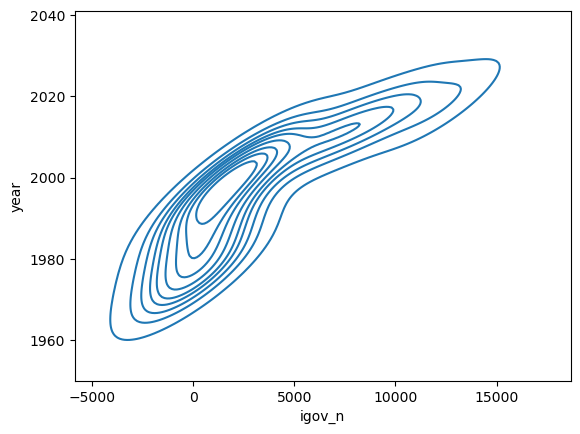

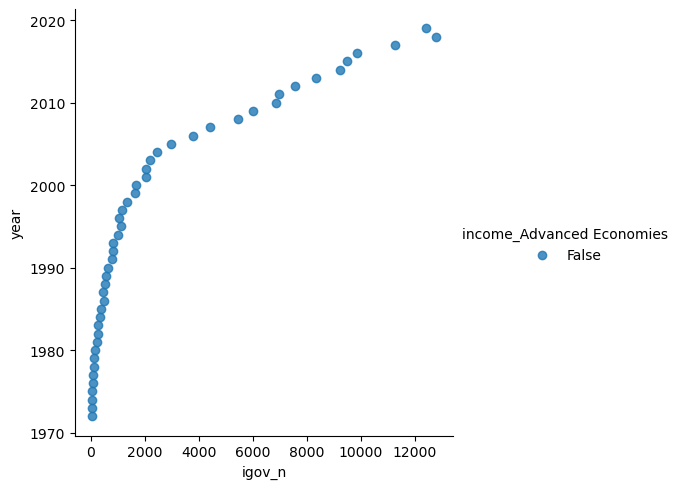

In [18]:
sns.kdeplot(data=lin_df, x=target, y='year', label='igov_rppp')

sns.lmplot(data=lin_df, x=target, y='year', hue='income_Advanced Economies', fit_reg=False)

<Axes: >

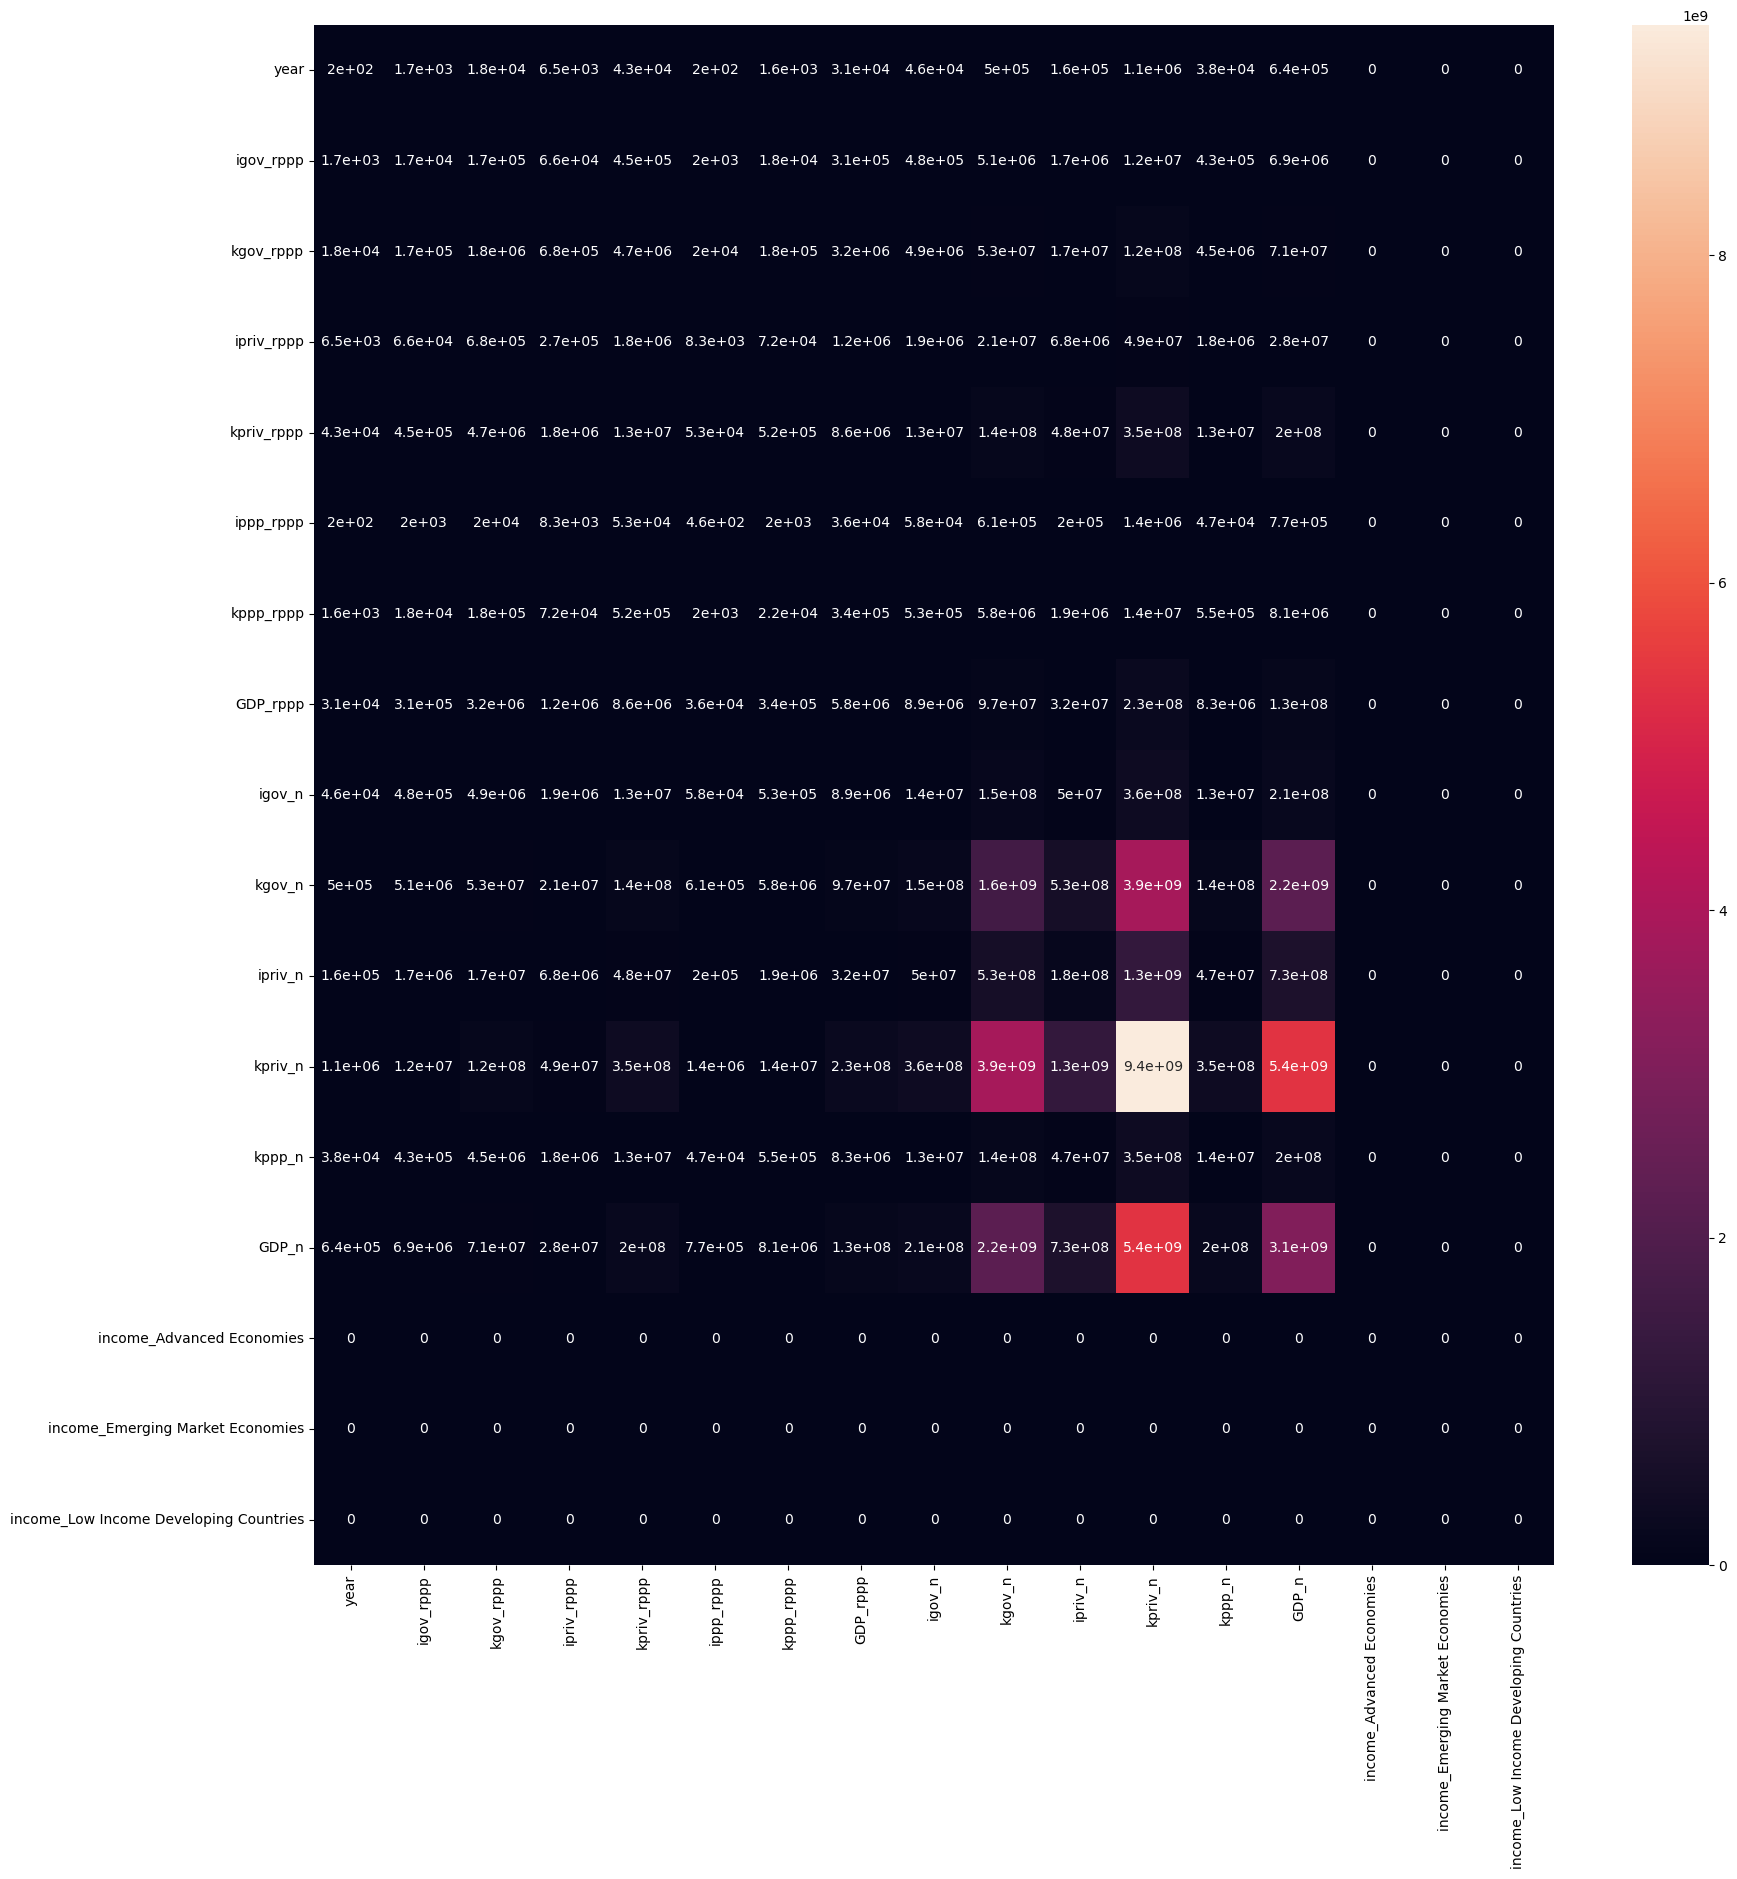

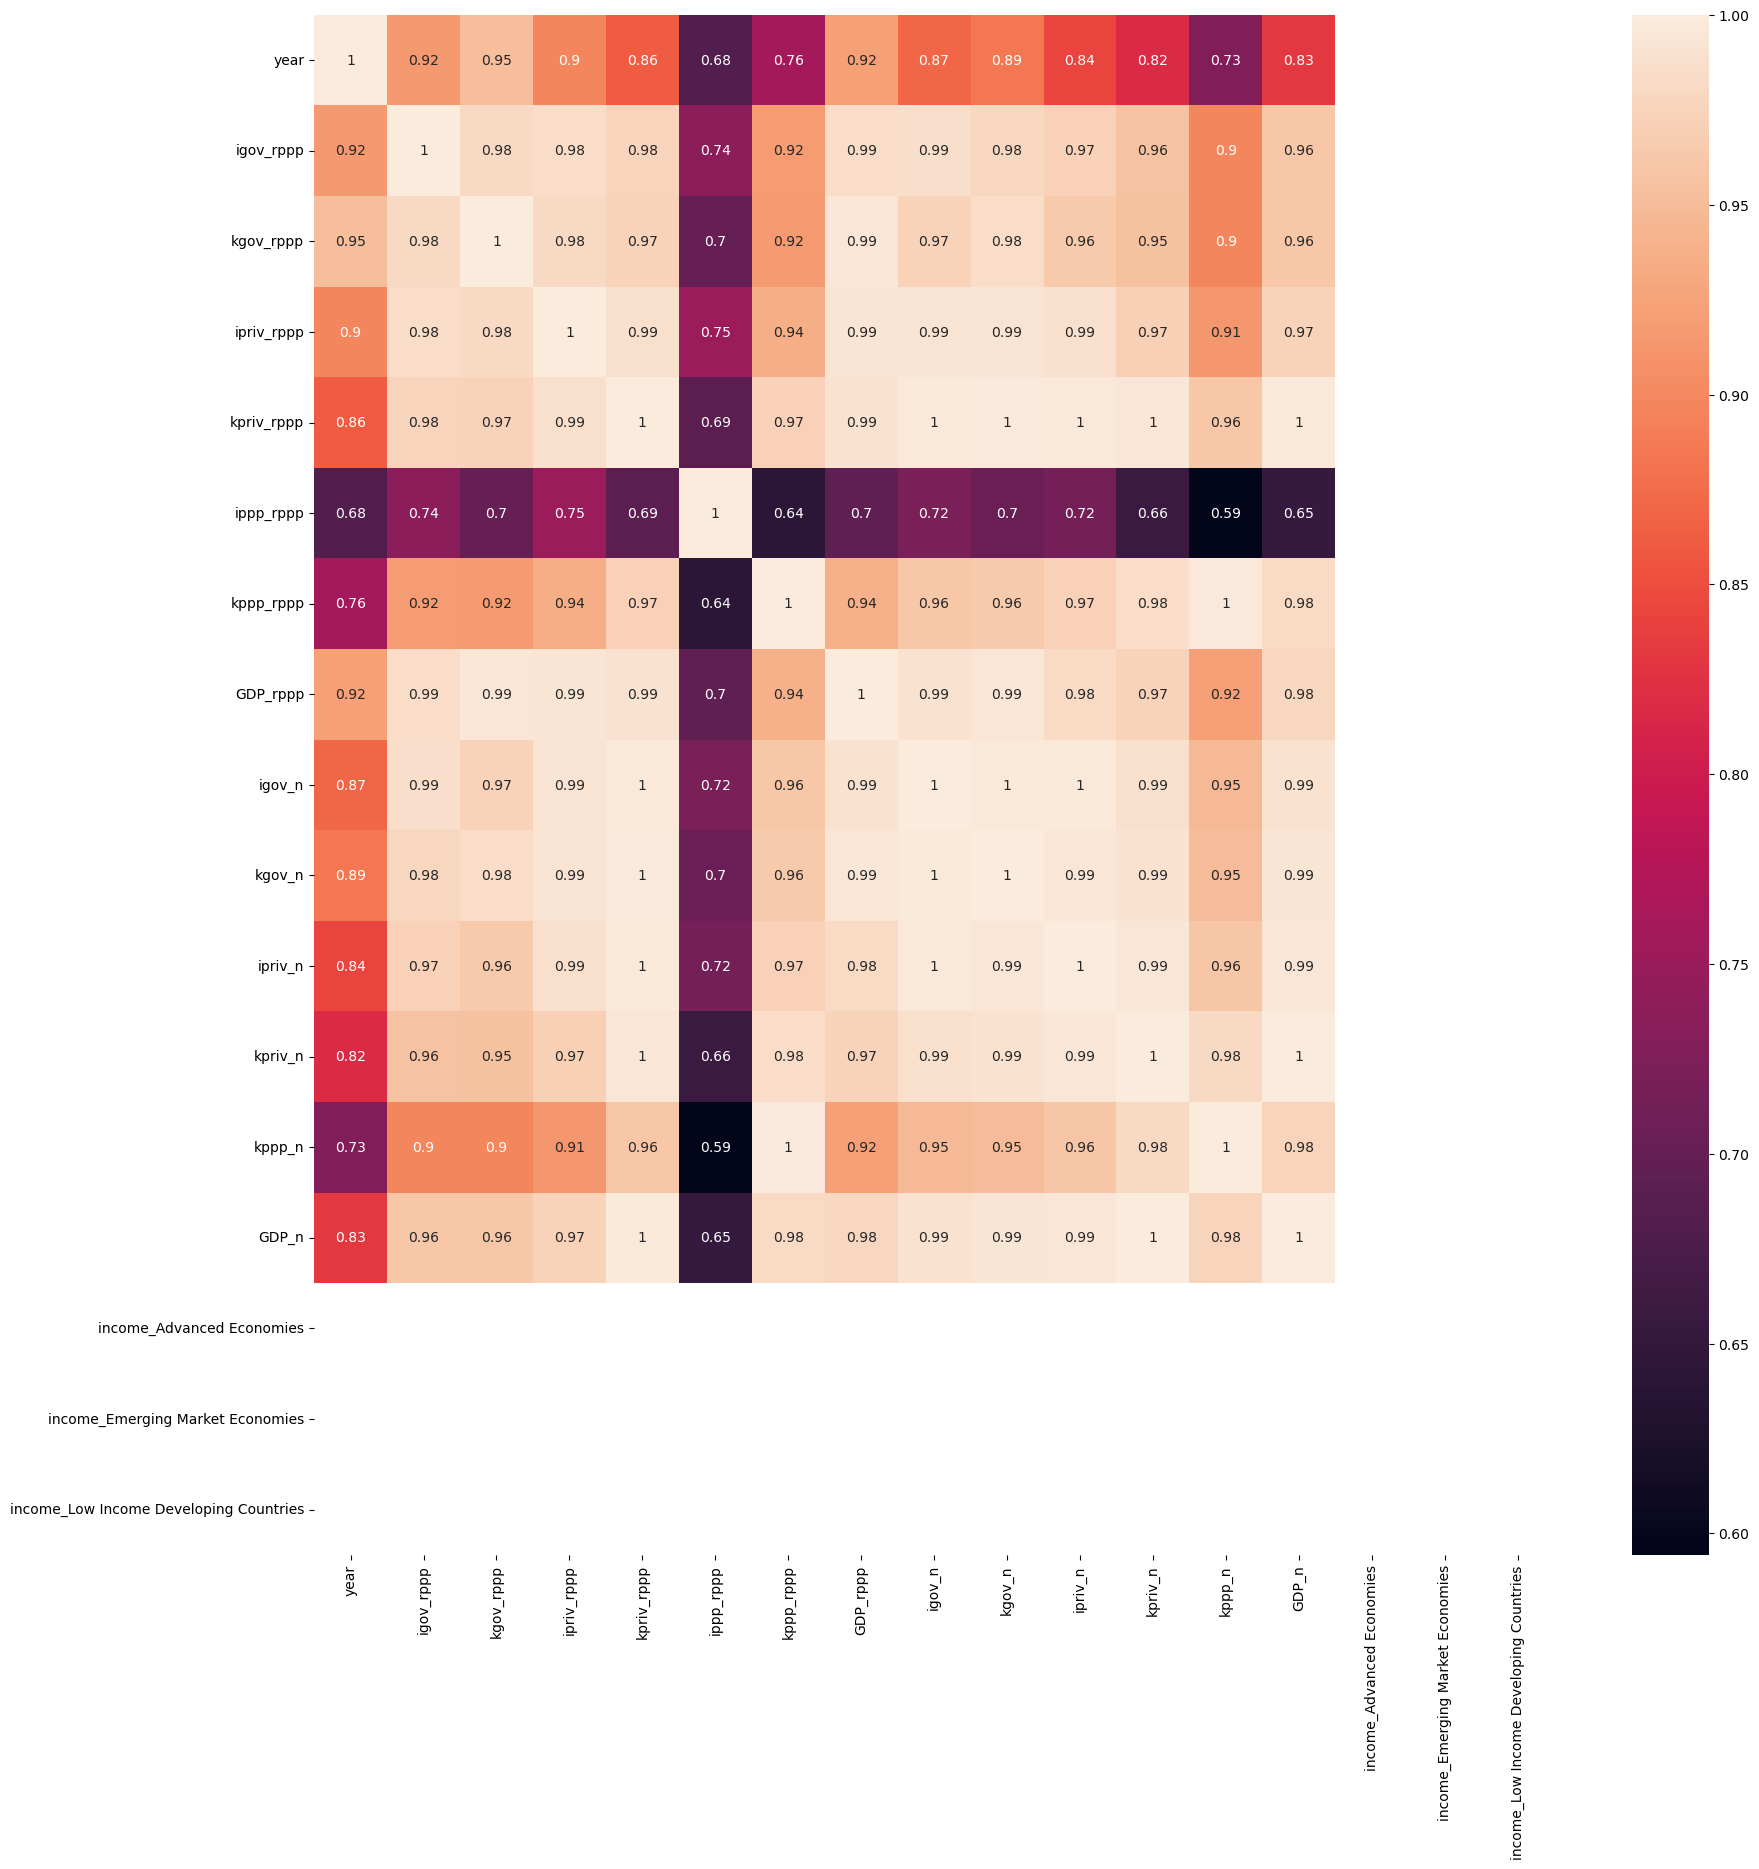

In [22]:
# correlation
plt.figure(figsize=(20, 20))
sns.heatmap(lin_df.corr(), annot=True)
# cavariance
plt.figure(figsize=(20, 20))
sns.heatmap(lin_df.cov(), annot=True)


In [71]:
x_= lin_df.drop([target, 'income_Advanced Economies', 'income_Emerging Market Economies', 'income_Low Income Developing Countries'], axis=1)
y= lin_df[target]

# Calculate the covariance matrix
lin_df_cov = lin_df.drop([target, 'income_Advanced Economies', 'income_Emerging Market Economies', 'income_Low Income Developing Countries'], axis=1).cov()

# Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(x_.cov())

In [72]:
eigenvalues , eigenvectors

(array([1.42957972e+10, 2.82557816e+07, 2.38446976e+06, 1.15306730e+06,
        2.48217387e+05, 2.54395052e+04, 1.11759666e+04, 1.66094653e+03,
        2.12821083e+02, 7.26941142e+01, 1.36454240e+01, 2.01274015e-01,
        1.05003880e+00]),
 array([[-9.71081287e-05,  1.38587278e-03, -7.21444221e-04,
         -1.17903363e-03, -2.55601854e-04,  2.84515168e-03,
          1.71497254e-02, -4.06842420e-03,  1.00226975e-02,
          4.23219729e-02, -2.38403465e-02, -8.85519705e-01,
         -4.61597466e-01],
        [-1.04327157e-03,  5.05871679e-03,  2.04287928e-03,
          7.05288344e-03, -9.04988073e-03,  6.59886063e-02,
          1.20880625e-01, -1.14941372e-01,  8.66680632e-01,
         -4.03481233e-01,  2.29312156e-01, -2.46352445e-02,
          2.31512371e-02],
        [-1.07212864e-02,  6.57702246e-02, -4.00620187e-02,
         -5.86412078e-02,  5.93740117e-03,  5.80359788e-04,
          8.79501424e-01, -4.26094336e-01, -1.86955808e-01,
         -1.18591335e-02,  9.99568550e-03,  

C:\Users\ASUS\AppData\Local\Temp\ipykernel_26540\3053571606.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(eigenvectors)).colors  # Dynamically generate colors


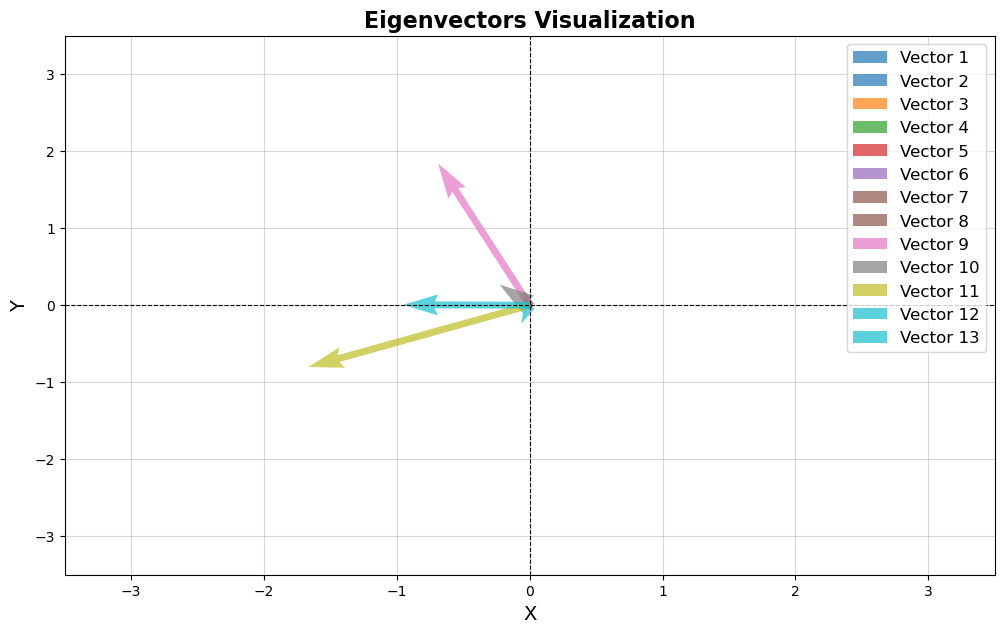

In [73]:
plt.figure(figsize=(12, 7))

# Dynamic scaling for better visibility
scaling_factor = 2 / np.max(np.abs(eigenvectors))

origin = [0], [0]  # Origin point
colors = plt.cm.get_cmap('tab10', len(eigenvectors)).colors  # Dynamically generate colors

for i in range(len(eigenvectors)):
    plt.quiver(*origin, eigenvectors[i, 0] * scaling_factor, eigenvectors[i, 1] * scaling_factor, angles='xy', scale_units='xy', scale=1, color=colors[i], alpha=0.7, label=f'Vector {i+1}')

# Set axis limits dynamically
plt.xlim(-3.5, 3.5)
plt.ylim(-3.5, 3.5)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')

plt.xlabel('X', fontsize=14)
plt.ylabel('Y', fontsize=14)
plt.title('Eigenvectors Visualization', fontsize=16, weight='bold')
plt.legend(loc='upper right', fontsize=12)
plt.grid(alpha=0.5)
plt.show()

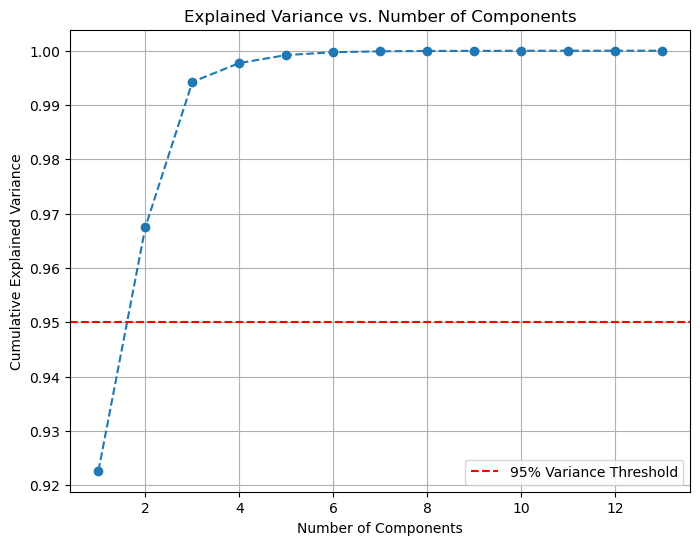

Optimal number of components: 2


In [60]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Scaling the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_)

pca = PCA()
pca.fit(x_scaled)

# Cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid()
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Threshold')
plt.legend()
plt.show()

# Print the optimal number of components to retain 95% variance
optimal_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Optimal number of components: {optimal_components}")


In [63]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)
# Extract eigenvectors and eigenvalues
# eigenvectors = pca.components_
# eigenvalues = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_ * 100

In [ ]:
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error, r2_score
# lr = LinearRegression()
# xt, xtest, yt, ytest = train_test_split(x_pca, y, test_size=0.1, random_state=42)
# lr.fit(xt, yt)
# y_pred = lr.predict(xtest)
# mse = mean_squared_error(ytest, y_pred)
# r2 = r2_score(ytest, y_pred)
# print(f'Mean Squared Error: {mse}')
# print(f'R2 Score: {r2}')


Mean Squared Error: 121830.5548569466
R2 Score: 0.9905013452983222


In [ ]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
lr = LinearRegression()
xt, xtest, yt, ytest = train_test_split(x_pca, y, test_size=0.1, random_state=42)
lr.fit(xt, yt)
y_pred = lr.predict(xtest)
mse = mean_squared_error(ytest, y_pred)
r2 = r2_score(ytest, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')


Mean Squared Error: 121830.5548569466
R2 Score: 0.9905013452983222


,index,isocode,ifscode,country,year,igov_rppp,kgov_rppp,ipriv_rppp,kpriv_rppp,ippp_rppp,...,GDP_rppp,igov_n,kgov_n,ipriv_n,kpriv_n,kppp_n,GDP_n,income_Advanced Economies,income_Emerging Market Economies,income_Low Income Developing Countries
0,4560,IND,534,India,1960,21.343164,469.095490,44.512562,414.289185,0.0,...,447.601074,NaN,NaN,NaN,NaN,0.0,175.371170,False,True,False
1,4561,IND,534,India,1961,22.196890,478.444489,46.293060,440.248566,0.0,...,463.651825,NaN,NaN,NaN,NaN,0.0,185.017517,False,True,False
2,4562,IND,534,India,1962,23.084764,488.313263,48.144779,466.752167,0.0,...,479.111816,NaN,NaN,NaN,NaN,0.0,198.925888,False,True,False
3,4563,IND,534,India,1963,24.008156,498.718750,50.070572,493.835327,0.0,...,510.586517,NaN,NaN,NaN,NaN,0.0,228.274063,False,True,False
4,4564,IND,534,India,1964,24.968483,509.678558,52.073395,521.534241,0.0,...,548.536560,NaN,NaN,NaN,NaN,0.0,266.142548,False,True,False
5,4565,IND,534,India,1965,25.967222,521.210876,54.156330,549.886108,0.0,...,536.778503,NaN,NaN,NaN,NaN,0.0,280.976868,False,True,False
6,4566,IND,534,India,1966,27.005911,533.334656,56.322582,578.929016,0.0,...,534.711670,NaN,NaN,NaN,NaN,0.0,315.630280,False,True,False
7,4567,IND,534,India,1967,28.086147,546.069458,58.575485,608.702209,0.0,...,577.154785,NaN,NaN,NaN,NaN,0.0,370.512909,False,True,False
8,4568,IND,534,India,1968,29.209591,559.435547,60.918503,639.246033,0.0,...,606.548584,NaN,NaN,NaN,NaN,0.0,396.741211,False,True,False
9,4569,IND,534,India,1969,30.377974,573.454041,63.355240,670.601807,0.0,...,674.483032,NaN,NaN,NaN,NaN,0.0,438.366638,False,True,False
